## Algoritmos de Reducción de Dimensiones
El conjunt de dades sobre el càncer de mama és una dada multivariant de valor real que consta de dues classes, 
en què cada classe significa si un pacient té càncer de mama o no. Les dues categories són: maligna i benigna.

La classe maligna té 212 mostres, mentre que la classe benigna té 357 mostres.

Té 30 funcions compartides en totes les classes: radi, textura, perímetre, àrea, suavitat, dimensió fractal, etc.
    
Conjunto de Datos: incluido en scikit-learn
Fuente: 

# Importar las librerías

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Importar los datos

In [4]:
breast=datasets.load_breast_cancer()

# Explorar y visualizar los datos

In [5]:
#breast.DESCR

In [6]:
print(len(breast.feature_names))
breast.feature_names


30


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
breast.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
print(len(breast.target))
print(breast.target[0:40])

569
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0]


## Dades

In [10]:
breast.data.shape

(569, 30)

In [11]:
type(breast.data)

numpy.ndarray

In [12]:
breast.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

## Valores Objetivo Etiquetados

In [13]:
breast.target.shape

(569,)

In [14]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Nombres Valores Objetivo

In [15]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

# Preparar los Datos

In [16]:
X = breast.data
y = breast.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Crear el Modelo de Reducción de las Dimensiones

In [18]:
### PCA (Principal Component Analysis)

In [19]:
# Crear el Modelo PCA para reducir de 64 a 2 dimensiones
model = PCA(2)
model

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Ajustar el modelo a los datos

**model.fit_transform(X)**


In [20]:
X_reduced = model.fit_transform(X)
print("Dimensiones Originales: ", X.shape)
print("Dimensiones Reducidas: ", X_reduced.shape)

Dimensiones Originales:  (569, 30)
Dimensiones Reducidas:  (569, 2)


In [21]:
type(X_reduced)


numpy.ndarray

# Visualizar el Resultado


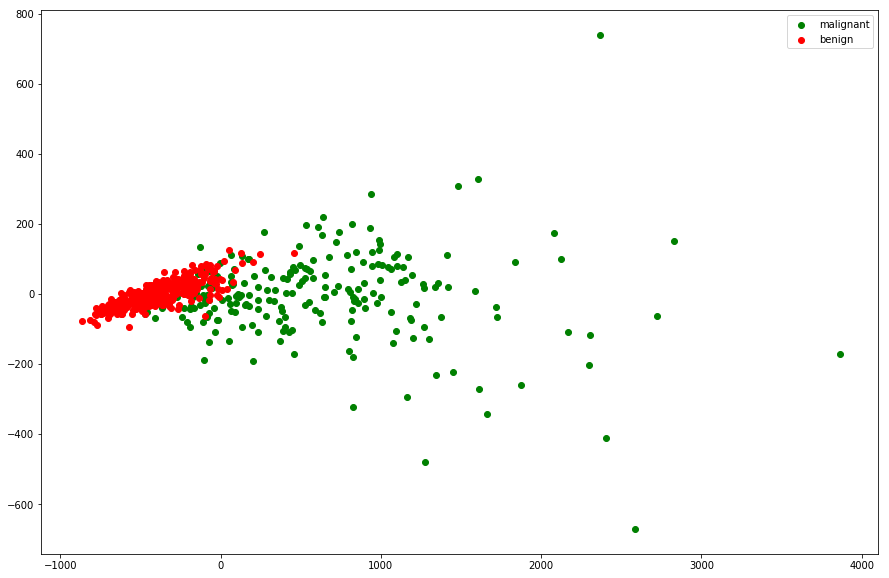

In [22]:
colors = np.array(["green", "red"])
fig=plt.figure(figsize=(15, 10))
for ind, color in enumerate(colors):
    plt.scatter(X_reduced[y==ind, 0], X_reduced[y==ind, 1],c=color , label=color)
plt.legend(labels=breast.target_names)


In [23]:
print(model.mean_)
print(np.mean(X[:,0]))


[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
14.127291739894552


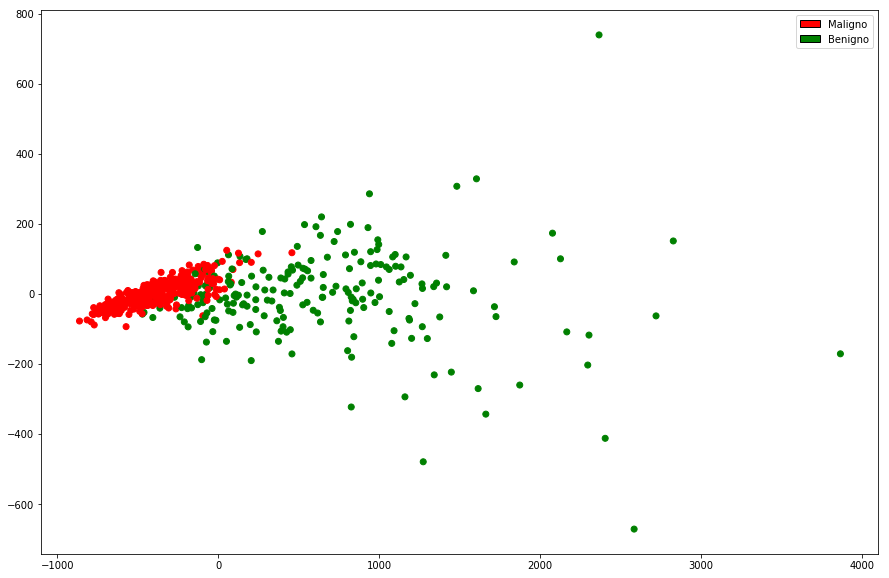

In [24]:
from matplotlib.patches import Patch

colors = np.array(["green", "red"])
labels= ['Benigno','Maligno']
plt.figure(figsize=(15, 10))
p=plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors[y])
legend_elements = [Patch(facecolor='red', edgecolor='black',label='Maligno'),
                  Patch(facecolor='green',edgecolor='black', label='Benigno')]
plt.legend(handles=legend_elements)


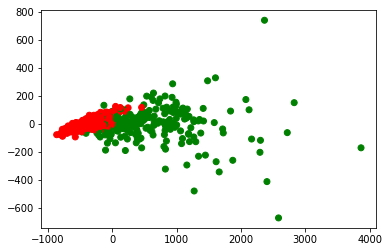

In [25]:
color = ['red' if i==1  else 'green' for i in y]
labels= ['Maligno' if i==1  else 'Benigno' for i in y]
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=color, label=labels)


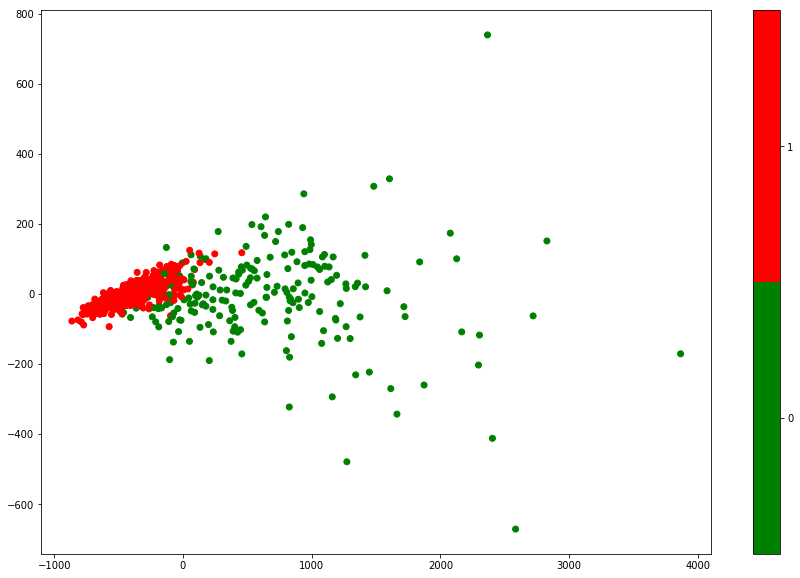

In [26]:
import matplotlib.colors as mcolors
plt.figure(figsize=(15, 10))
cmap = mcolors.ListedColormap(["green", "red"])
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=y, cmap=cmap,label=breast.target_names)
bar=plt.colorbar( )
labels= np.linspace(0,1,2).astype(int)
loc = [labels[0] + .25, labels[0] + .75]
bar.set_ticks(loc)
bar.set_ticklabels(labels)

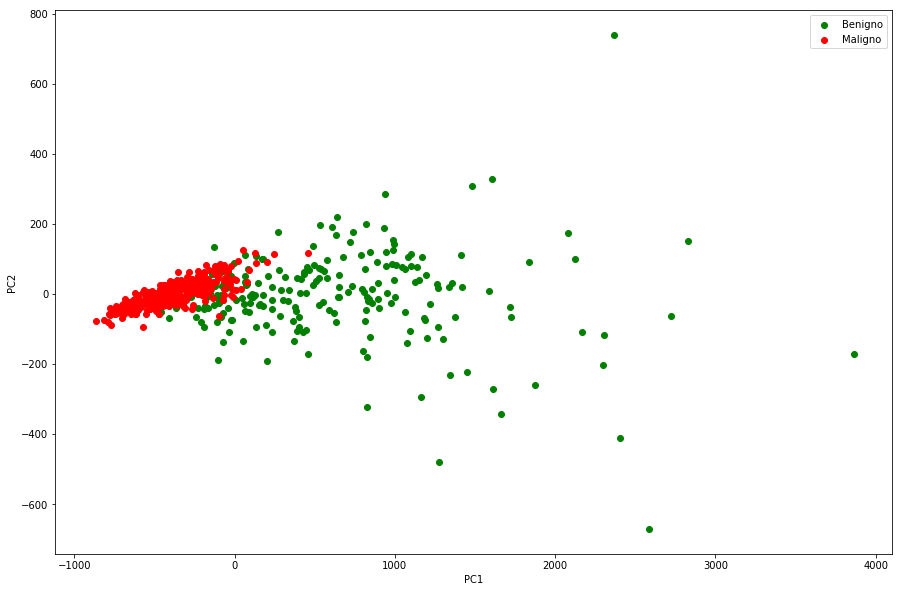

In [27]:
plt.figure(figsize=(15, 10))
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1], color="green", label="Benigno")
plt.scatter(X_reduced[y!=0, 0], X_reduced[y!=0, 1], color="red", label='Maligno')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()


# SVM with Python

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [29]:
# creamos dataframe
df_cancer = pd.DataFrame(breast.data, columns=breast.feature_names)

In [30]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
m_corr= df_cancer.corr()

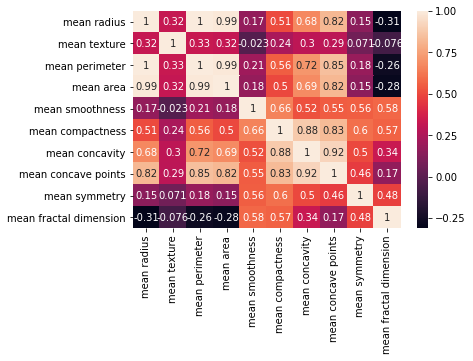

In [32]:
import seaborn as sns
# mostramos los de las 10 primeras variables
sns.heatmap(m_corr.iloc[:10,:10], annot = True)
plt.show()

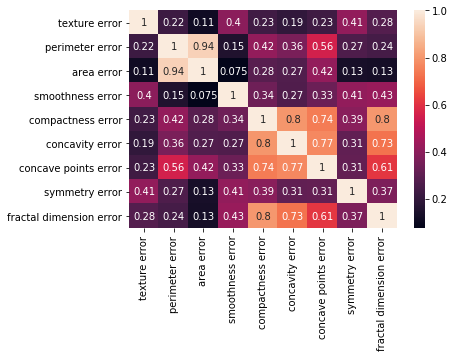

In [33]:
# una altra forma de reduir la matriu de correlació a partir de les columnes que esn interesen
feature_error= list(df_cancer.columns[11:20])
sns.heatmap(df_cancer[feature_error].corr(), annot = True)
plt.show()


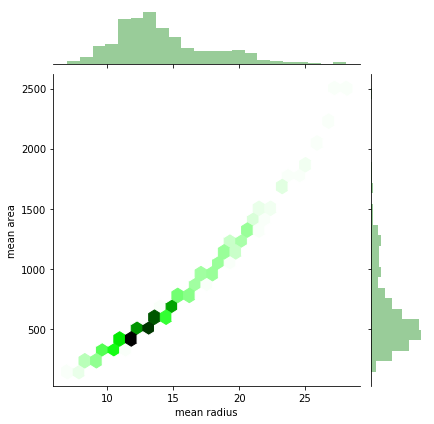

In [34]:
sns.jointplot(data=df_cancer, x="mean radius",y="mean area", kind='hex', color='green')

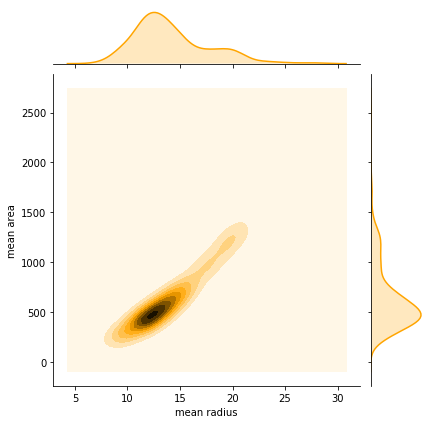

In [35]:
#Kernel density estimation
#'histograma de característiques individuals que es representen als límits, els contorns representen
# l'estimació de la densitat del nucli 2D (KDE). En lloc d'histogrames discrets només, del KDE sovint
#són úti, lhttps://mathisonian.github.io/kde/

sns.jointplot(data=df_cancer, x="mean radius",y="mean area", kind='kde', color="orange")

In [36]:
df_cancer['target'] = breast.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


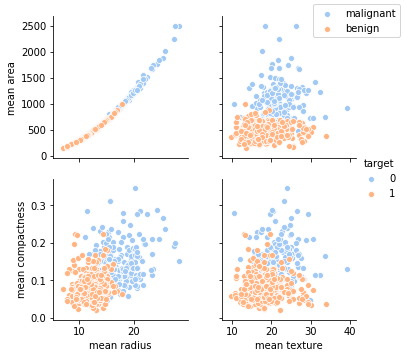

In [37]:
#gráfico dispersion 2 primeras variables

x_vars=["mean radius", "mean texture"]
y_vars=["mean area","mean compactness"]

g=sns.pairplot(df_cancer,x_vars=x_vars,y_vars=y_vars,hue='target', palette='pastel')
g.fig.legend(labels=breast.target_names)

In [83]:
X= df_cancer[df_cancer.columns[:-1]]
y= df_cancer.target
# stratify: El paràmetre conservarà la proporció de l'objectiu com en el conjunt de dades original, 
# també en el conjunt de dades de tren i prova.
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30,stratify=y )

In [84]:
X_train.shape

(426, 30)

In [40]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
218,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,0.2094,0.05581,...,25.73,28.64,170.30,2009.0,0.1353,0.3235,0.36170,0.18200,0.3070,0.08255
188,11.810,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,12.57,26.48,79.57,489.5,0.1356,0.1000,0.08803,0.04306,0.3200,0.06576
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.24030,0.07370,0.2556,0.09359
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.3089,0.35330,0.16630,0.2510,0.09445
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.82160,0.15710,0.3108,0.12590


In [41]:
model_svc= SVC(gamma='auto')
model_svc.fit(X_train, y_train)
print(model_svc)
prediccion = model_svc.predict(X_text)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [45]:
# per evitar un warning: classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
# 'precision', 'predicted', average, warn_for)` agegin el paràmetre labels=np.unique(prediccion)

print(classification_report(y_test, prediccion,labels=np.unique(prediccion)))

              precision    recall  f1-score   support

           1       0.63      1.00      0.77        90

   micro avg       0.63      1.00      0.77        90
   macro avg       0.63      1.00      0.77        90
weighted avg       0.63      1.00      0.77        90



In [143]:
acerts = (prediccion == y_test).sum()
print('aciertos: ', acerts/len(y_test)*100)

print('Score: ', model_svc.score(X_text,y_test)*100)


aciertos:  62.93706293706294
Score:  62.93706293706294


In [123]:
confusion_matrix(y_test, predict)

array([[ 0, 53],
       [ 0, 90]], dtype=int64)

Classifica malament la classe 0

# PipeLine: StandardScaler, PCA i SVM amb Grid-Search Cross Validation 
## Amb paràmetres 'C' i 'Gamma' per SVM

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [67]:
scalar= StandardScaler()
scalar.fit(X)
dades_escalades= scalar.transform(X)
dades_escalades

In [141]:

pipe_steps = [('escalar',StandardScaler() ),('pca', PCA()), ('svm', SVC() )]

# definim els paràmetres per a les funcions que s'executaran dintre del PipeLine
params_grid={
    'pca__n_components': [2,5,15],
     'svm__C': [0.1, 1, 10, 100, 1000],
     'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'svm__kernel': ['rbf']
}
pipeline = Pipeline(pipe_steps)

In [142]:
# n_jobs =-1 tots els processos en paral·lel
# cv cross validator, None, to use the default 5-fold cross validation

search = GridSearchCV(pipeline, params_grid, n_jobs=-1, verbose=1)
search

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('escalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'pca__n_components': [2, 5, 15], 'svm__C': [0.1, 1, 10, 100, 1000], 'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'svm__kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [143]:
import warnings
warnings.filterwarnings('ignore')

search.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   11.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('escalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'pca__n_components': [2, 5, 15], 'svm__C': [0.1, 1, 10, 100, 1000], 'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'svm__kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [144]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.967):
{'pca__n_components': 5, 'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}


In [145]:
search.best_estimator_

Pipeline(memory=None,
     steps=[('escalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [146]:
y_predic= search.predict(X_text) 

In [151]:
print(classification_report(y_test, y_predic,labels=np.unique(prediccion)))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        90

   micro avg       0.96      1.00      0.98        90
   macro avg       0.96      1.00      0.98        90
weighted avg       0.96      1.00      0.98        90



In [156]:
confusion_matrix(y_test, y_predic)

array([[49,  4],
       [ 0, 90]], dtype=int64)

In [152]:
acerts = (y_predic == y_test).sum()
print('aciertos: ', acerts/len(y_test)*100)

aciertos:  97.2027972027972


In [117]:
best = search.best_estimator_

In [153]:
pca=best.named_steps['pca']

In [154]:
X_pca=pca.fit_transform(X)
print(X_pca)

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


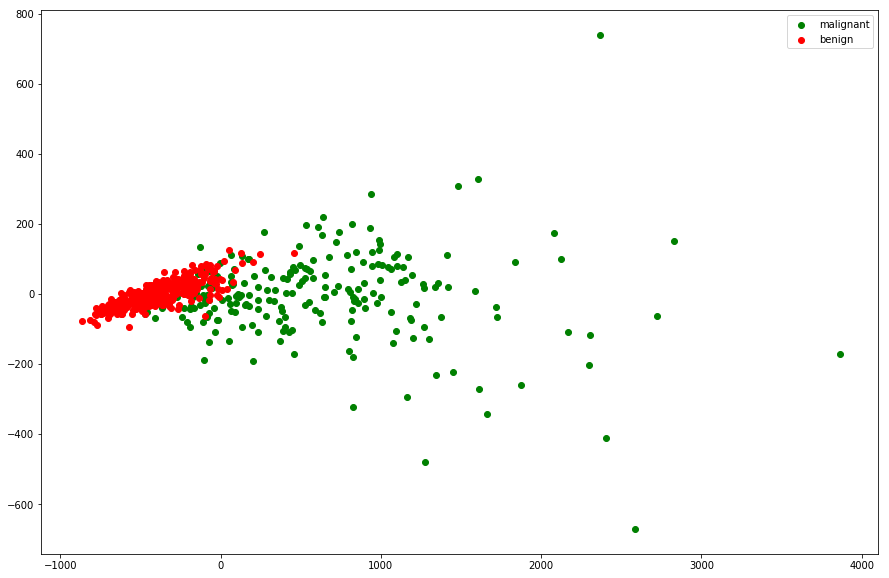

In [155]:
# les dos primeres components
colors = np.array(["green", "red"])
fig=plt.figure(figsize=(15, 10))
for ind, color in enumerate(colors):
    plt.scatter(X_pca[y==ind, 0], X_pca[y==ind, 1],c=color , label=color)
plt.legend(labels=breast.target_names)


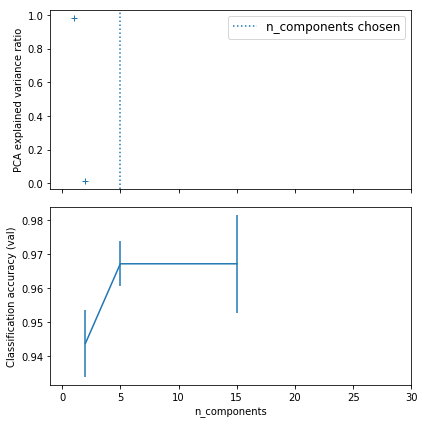

In [150]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.xlim(-1, 30)

plt.tight_layout()
plt.show()

array([1, 2])